## Install standalone library

In [ ]:
## stop words list
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=e54207b825ac86d4cf7e2326e86dbae81000aaed2743ee1273af5f2fdcffe939
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
## automate data analysis
!pip3 install pandas_profiling --upgrade
!pip3 install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 4.4 MB/s 
     |████████████████████████████████| 11.1 MB 30.7 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
     |████████████████████████████████| 4.7 MB 36.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 102 kB 4.2 MB/s 
     |████████████████████████████████| 690 kB 43.5 MB/s 
     |████████████████████████████████| 812 kB 42.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7e3508b9e1a44f3a07afedd7ce4948b043da427173e12bb7a2c09c81351118d5
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=00ad4e204acd007507e73f85d7

## Import necessary library 

In [ ]:
## Normal libs to work with data
## adding support for large, multi-dimensional arrays and matrices.
import numpy as np 
## data structures and operations for manipulating numerical tables and time series.
import pandas as pd 

################################################################################
# Visualization
## the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline 
## provides an implicit, MATLAB-like, way of plotting
import matplotlib.pyplot as plt 
## provides a high-level interface for drawing attractive and informative statistical
import seaborn as sns

################################################################################
## Utility
## automate data analysis
#import pandas_profiling as pp
import re

################################################################################
## Text processing
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from stop_words import get_stop_words

In [38]:
import matplotlib

In [45]:
stop_words.__version__

AttributeError: ignored

In [ ]:
Ä## download external libs
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Get data

In [ ]:
## get data from remote file if needed
## url = "https://docs.google.com/spreadsheets/d/1ZVemCFQ_cWCEjriTFBLYHGM33q56eISk/edit?usp=sharing&ouid=102981063366545209715&rtpof=true&sd=true"
## s = requests.get(url).text

## get data by uploading file
df = pd.read_excel('Womens_Clothing_E_Commerce_Reviews.xlsx', sheet_name='Reviews', index_col=0)

In [ ]:
## check 5 rows of dataset
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0.0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1.0,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


# Data exploratory




## 1. Automate data analysis - Pandas profiling

In [ ]:
## automate simple analysis using pandas profiling library
#prof = pp.ProfileReport(df)
#prof

Comment for basic information:
- Dataset has 10 features. 5 numeric | 5 categorical
- Dataset has 23481 rows.

Comment for null value:
- Division name, Department name, Class name have 14 rows of empty (<0,1%). We can delete these rows
- Title has 3810/23481 empty rows, Review text has 845/23481 rows. We can join 2 features together to reduce the empty and remove the remaining.

Comment for frequency and imbalance:
- Clothing ID: There are total of 1206 unique products in this dataset. Interestingly, top 10 most reviewed products accounted for 25% of the reviews count
- Age: age range from 18-99. Mostly distribution from 34-52 with mean = 43,2 and standard deviation = 12,28
- Title: max length = 52 and min length = 2
- Review text: max length = 508 and min length = 9
- Rating: imbalance dependent feature since rating 5 stars = 55,9% and 1 star = 3,6%
- Recommended IND: boolean value, imbalance since recommended = 82,2% and not recommend = 17,8%
- Positive Feedback Count: the number of other customers who found this review positive (like). Values are very skewed because most of reviews get only 0-1 like, while there is an outlier review has 122 (max) likes.
- Division name: only 3 values but imbalance because majority of divisions are General(59%), General petit(34,6%), and Initmates only (6,4%)
- Department Name: has 5 values with Tops accounted the most (44,6%)
- Class Name: Top 3 classes accounted for the most reviews are Dresses-6317(26,9%), Knits-4841(20,6%), Blouses-3097(13,2%), which are 60,7% of total

Comment for the correlation matrix (bivarivate analysis - continuous vs continuous):
- Obviously, the Recommended IND has strong positive correlation with Rating 
- Positive feedback count has average postive correlation with Rating and Recommended IND

## 2. Automate data analysis - Coding & visualisation

### Categorical vs Categorical

In [ ]:
## a bug in google colab, need to enable inline after pandas profiling
%matplotlib inline
sns.set(font_scale=1.2)
## automate bivariate analysis (categorical vs categorical)
def compare_cate_cate(list_columns, df):

    ## getting length of list 
    length = len(list_columns)
   
    ## color palette for each figure
    color_lst = ['Purples', 'Reds', 'Blues']
    color_idx = 0

    ## iterating the index  
    for i in range(length):
        j = i + 1
        while j < length:
            

            ## setting fig size
            plt.figure(figsize=(14,15))
            ## figure 1: count value
            ax1 = plt.subplot2grid((2,2),(0,0))
            ax1 = sns.heatmap(pd.crosstab(df[list_columns[j]], df[list_columns[i]]),
                              cmap=color_lst[color_idx],
                              annot=True, ## show number
                              linewidths=0,
                              fmt='g', 
                              cbar_kws={'label': 'Count'})
            ax1 = plt.title(list_columns[i] + ' Count by ' + list_columns[j] + ' - Crosstab\n Heatmap Distribution (Count)')
            
            ## figure 2: percentage value
            ax2 = plt.subplot2grid((2,2),(0,1))
            ax2 = sns.heatmap(pd.crosstab(df[list_columns[j]], df[list_columns[i]],normalize=True).mul(100).round(0),
                              cmap=color_lst[color_idx],
                              annot=True,
                              fmt='g',
                              cbar_kws={'label': 'Percentage %'})
            for t in ax2.texts: t.set_text(t.get_text() + " %") # annot %
            ax2 = plt.title(list_columns[i] + ' Count by ' + list_columns[j] + ' - Crosstab\n Heatmap Distribution (%)')
            plt.tight_layout(pad=0)
            
            color_idx += 1
            j = j + 1
        i = i + 1
    plt.show()

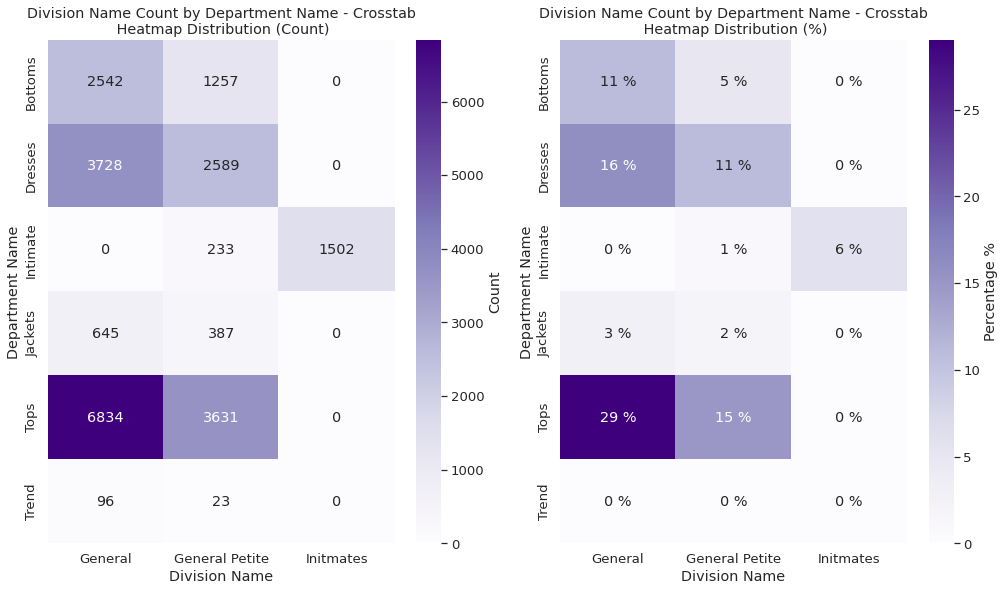

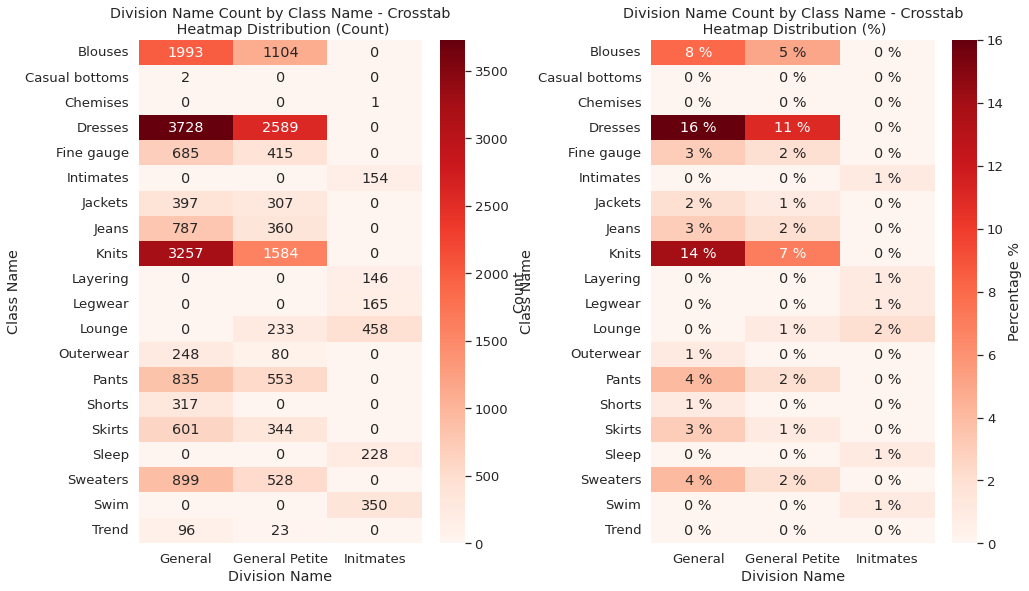

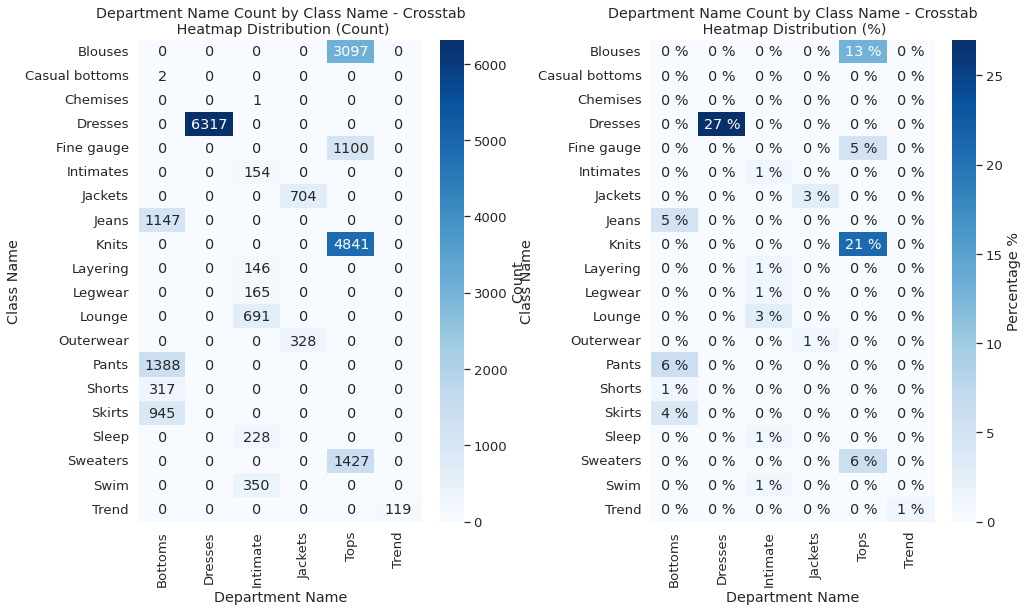

In [ ]:
compare_cate_cate(['Division Name',	'Department Name', 'Class Name'], df)

Comment on bivariate analysis (categorical vs categorical):
- Department name vs Division name: Product reviews mostly in (Tops|General) 
- Class name vs Division name: Product reviews mostly in (Dress|General), (Knits|General)
- Class name vs Department name: Product reviews mostly in (Dress|Tops), (Knits|Tops)
- In general: Product reviews are in General (Division name), Department (Tops), and Class name (Dress, Knits)

### Categorical vs Continuous

In [ ]:
def compare_cate_cont(list_cate_col, list_cont_col, df):
    for cate_col in list_cate_col:
        for cont_col in list_cont_col:
            print('*Box plot: ')
            plt.figure(figsize=(12, 10))
            sns.boxplot(x=cont_col, y=cate_col, data=df, palette="Set3", showmeans = True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
            plt.show()

*Box plot: 


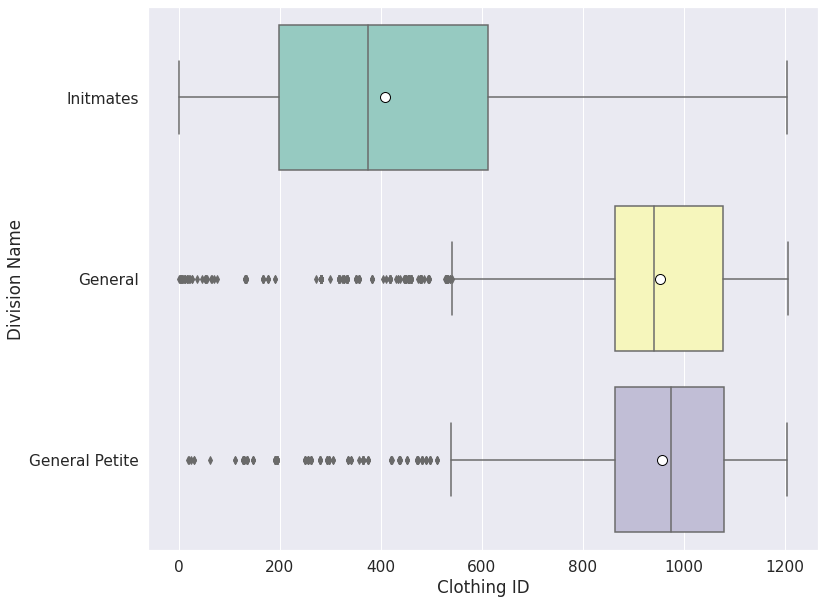

*Box plot: 


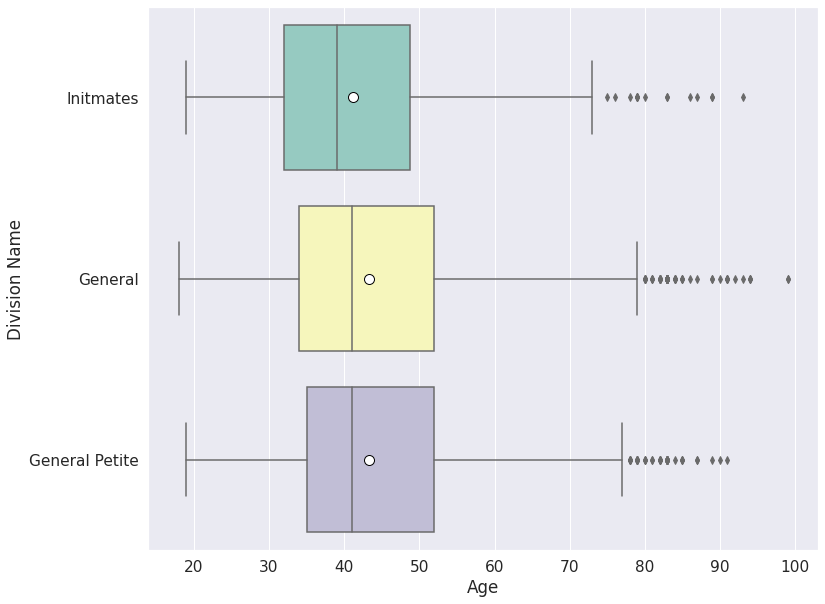

*Box plot: 


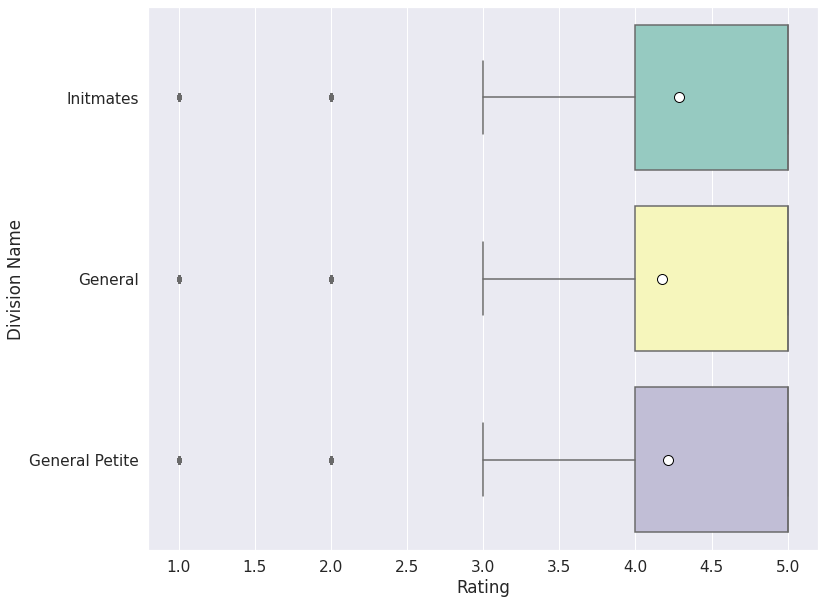

*Box plot: 


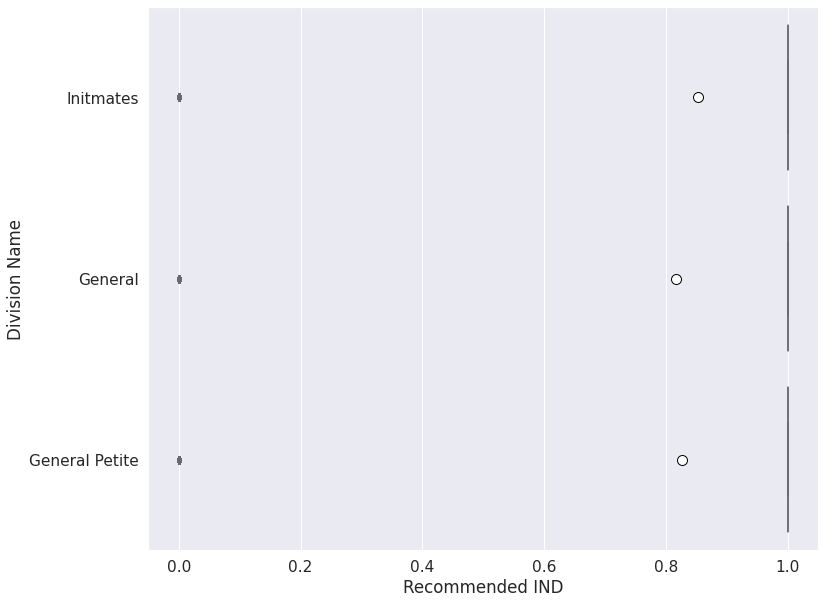

*Box plot: 


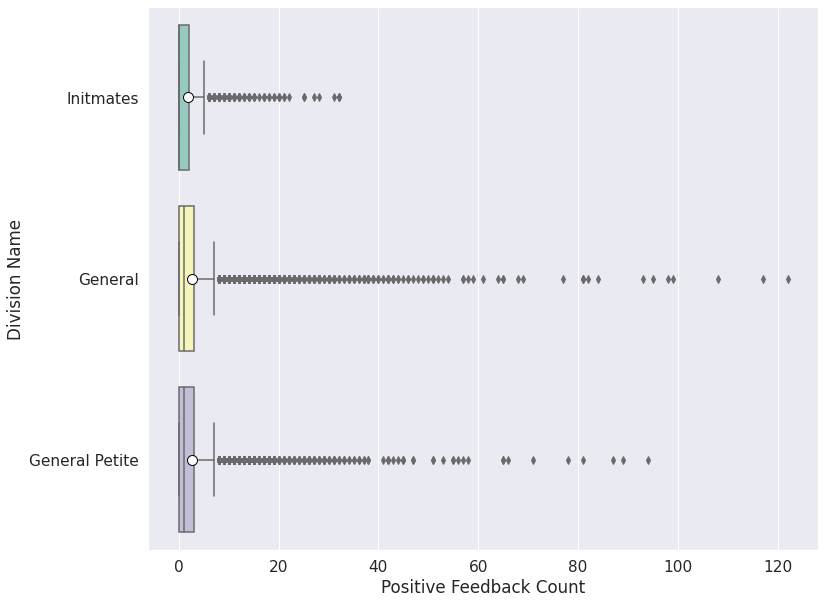

*Box plot: 


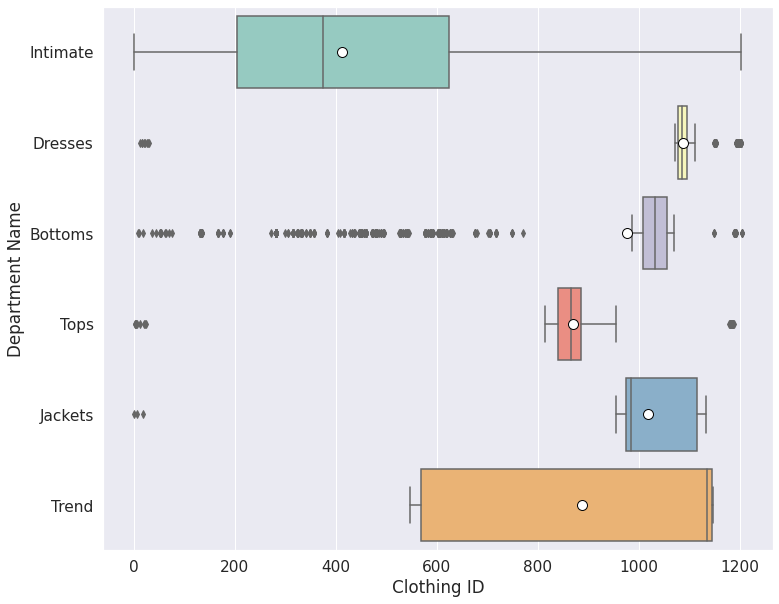

*Box plot: 


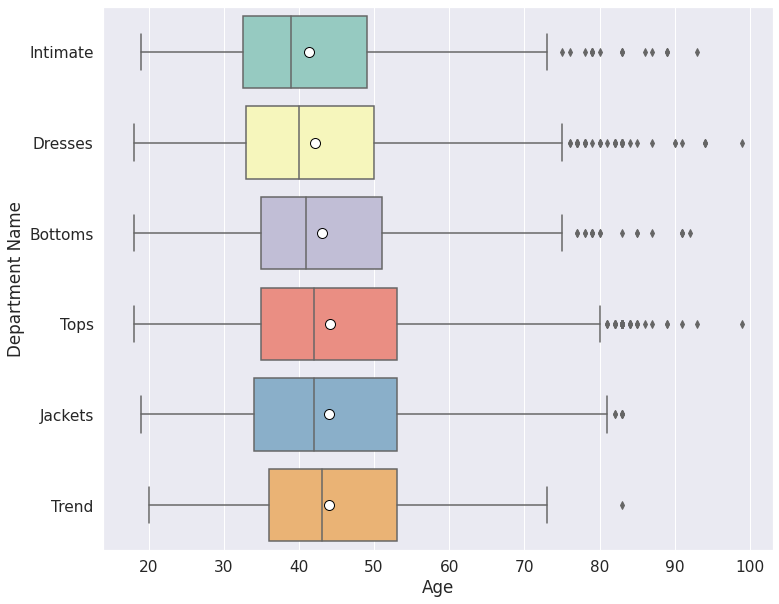

*Box plot: 


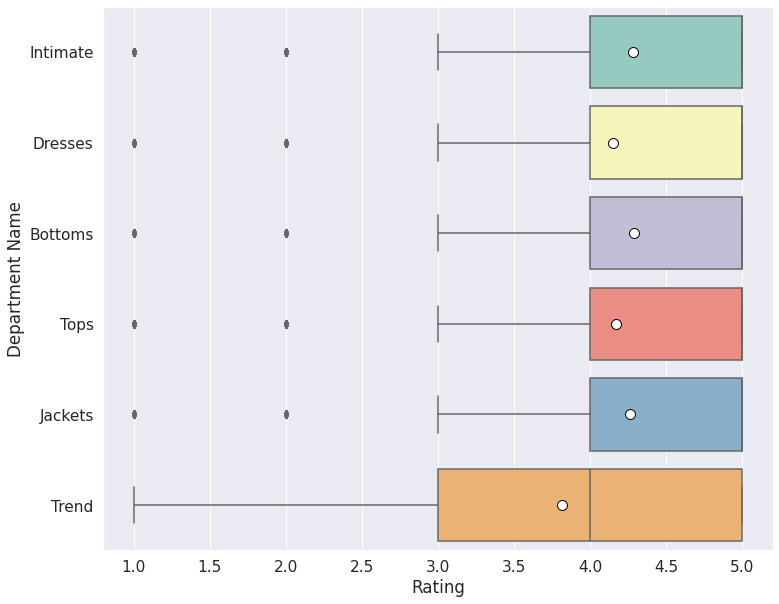

*Box plot: 


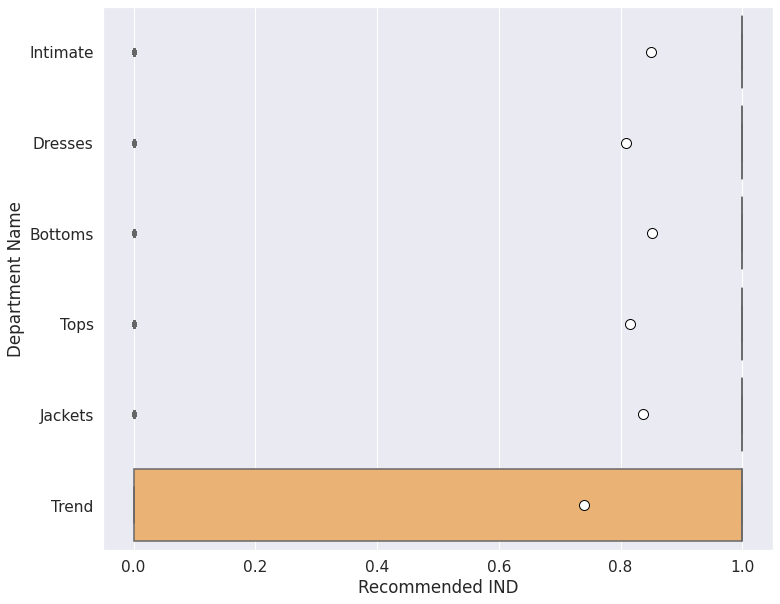

*Box plot: 


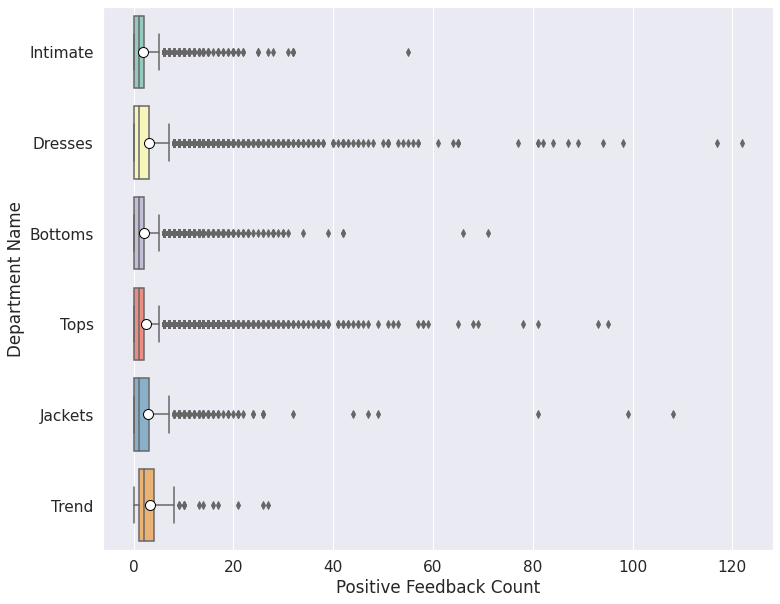

*Box plot: 


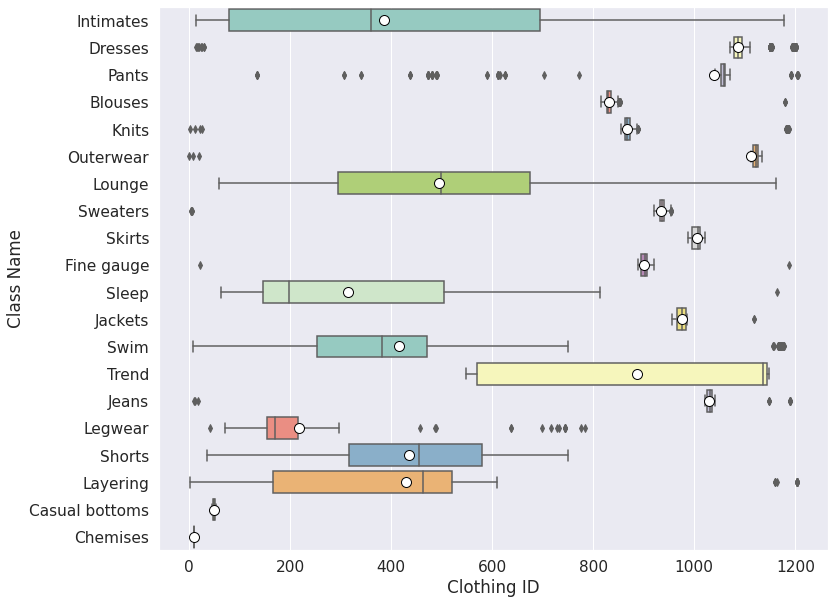

*Box plot: 


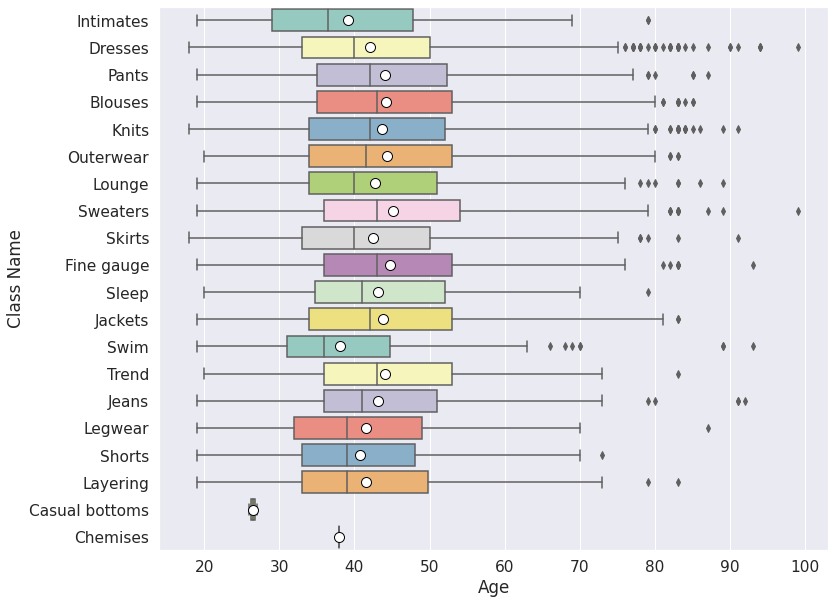

*Box plot: 


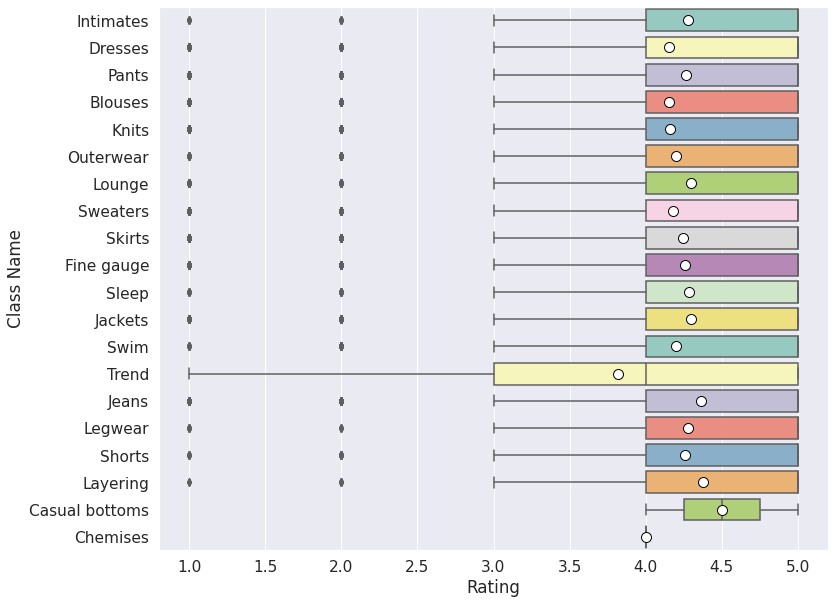

*Box plot: 


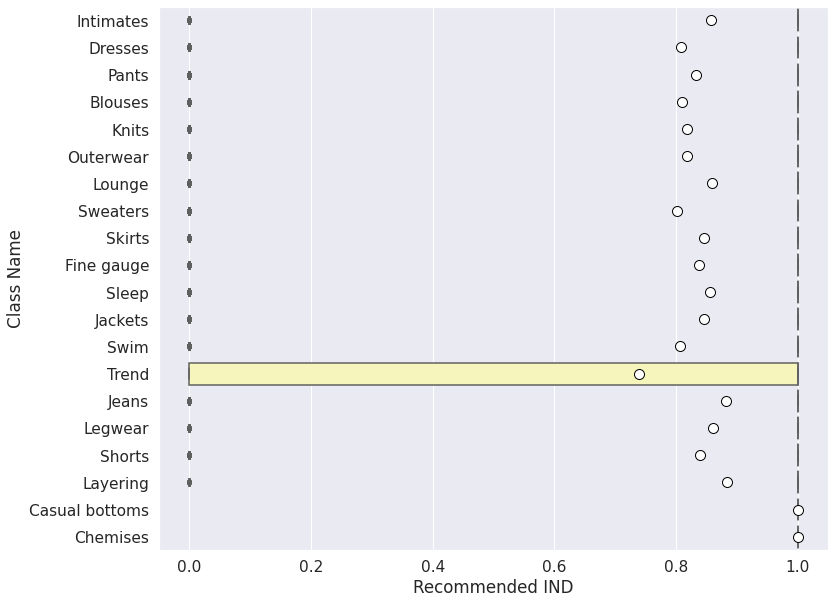

*Box plot: 


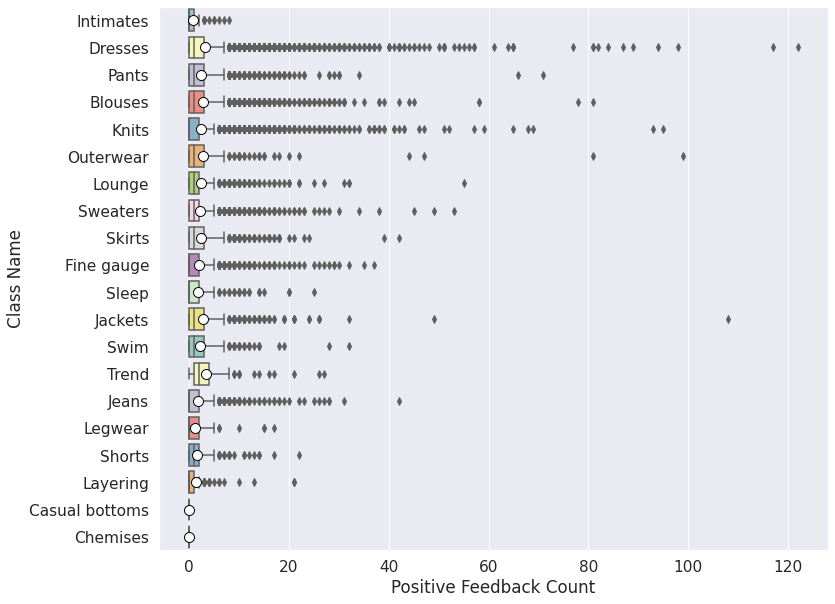

In [ ]:
sns.set(font_scale=1.4)
compare_cate_cont(['Division Name',	'Department Name', 'Class Name'], ['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count'], df)

Comment on categorical vs continuous:
- The boxplots don't show much valuable information, since all the insights can be seen in uni-variate analysis

# Feature engineering

## Fill NaN value with ' '. Avoid nan string when combine texts

In [ ]:
## avoid nan string when combine texts
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')

## Combine Title & Review Text column into 1 Review Description column

In [ ]:
## combine Title & Review Text column into 1 Review Description column
df = df.assign(ReviewDescription = df['Title'].astype(str) + ' ' + df['Review Text'].astype(str))
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription
0.0,767.0,33.0,,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1.0,1080.0,34.0,,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## Drop NaN values

In [ ]:
## drop NaN values in categorical columns
df = df.dropna()
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
ReviewDescription          0
dtype: int64

In [ ]:
## count number of rows after drop na
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 23467 entries, 0.0 to 23480.0
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              23467 non-null  float64
 1   Age                      23467 non-null  float64
 2   Title                    23467 non-null  object 
 3   Review Text              23467 non-null  object 
 4   Rating                   23467 non-null  float64
 5   Recommended IND          23467 non-null  float64
 6   Positive Feedback Count  23467 non-null  float64
 7   Division Name            23467 non-null  object 
 8   Department Name          23467 non-null  object 
 9   Class Name               23467 non-null  object 
 10  ReviewDescription        23467 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.1+ MB


## Remove special character in ReviewDescription column

In [ ]:
## remove special character
df['ReviewDescription'] = df['ReviewDescription'].str.replace(r"[^a-zA-Z ]","")
df['ReviewDescription'] = df['ReviewDescription'].str.replace(r"[0-9]","")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription
0.0,767.0,33.0,,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comf...
1.0,1080.0,34.0,,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,Love this dress its sooo pretty i happened ...
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,My favorite buy I love love love this jumpsuit...
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## Binning rating

In [ ]:
bins = [0, 3, 5]
labels = [0,1]
df['Binned Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels)
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription,Binned Rating
23476.0,1104.0,34.0,Great dress for many occasions,I was very happy to snag this dress at such a ...,5.0,1.0,0.0,General Petite,Dresses,Dresses,Great dress for many occasions I was very happ...,1
23477.0,862.0,48.0,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3.0,1.0,0.0,General Petite,Tops,Knits,Wish it was made of cotton It reminds me of ma...,0
23478.0,1104.0,31.0,"Cute, but see through","This fit well, but the top was very see throug...",3.0,0.0,1.0,General Petite,Dresses,Dresses,Cute but see through This fit well but the top...,0
23479.0,1084.0,28.0,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3.0,1.0,2.0,General,Dresses,Dresses,Very cute dress perfect for summer parties and...,0
23480.0,1104.0,52.0,Please make more like this one!,This dress in a lovely platinum is feminine an...,5.0,1.0,22.0,General Petite,Dresses,Dresses,Please make more like this one This dress in a...,1


## Create Review Length feature

In [ ]:
## convert from object to str to apply func len()
df['ReviewDescription Text']=df['ReviewDescription'].astype(str)

## apply len to column
df['Review Length']=df['ReviewDescription Text'].apply(len)

In [ ]:
df.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,0.017349,-0.017486,-0.015257,0.045815,0.093908
Age,0.017349,1.000000,0.026872,0.030622,0.043007,0.025300
Rating,-0.017486,0.026872,1.000000,0.792232,-0.064679,-0.078313
Recommended IND,-0.015257,0.030622,0.792232,1.000000,-0.068710,-0.051064
Positive Feedback Count,0.045815,0.043007,-0.064679,-0.068710,1.000000,0.206734
Review Length,0.093908,0.025300,-0.078313,-0.051064,0.206734,1.000000


## Check review length

[]

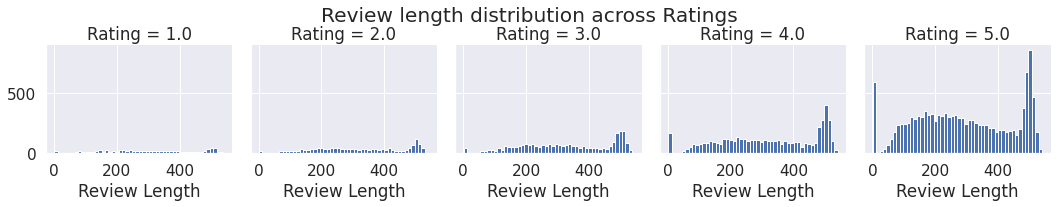

In [ ]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)
## adjust the height of figure
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Review length distribution across Ratings')
plt.plot()

Comment: 
- We can crearly see the length > 400 is more significant in the Rating 4.0 and 5.0

## Check top words appear the most

In [ ]:
## get top 10 words appear the most
import re
top_N = 10

lowered_text = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
processed_text = re.sub('[^A-Za-z]+', ' ', lowered_text)

## remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))
user_defined_stopwords = ['love', 'great', 'like', 'look', 'fit', 'ordered', 'really', 'perfect', 'one', 'well']
stop_words.extend(nltk_words)
stop_words.extend(user_defined_stopwords)

## tokenize words
word_tokens = word_tokenize(processed_text)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

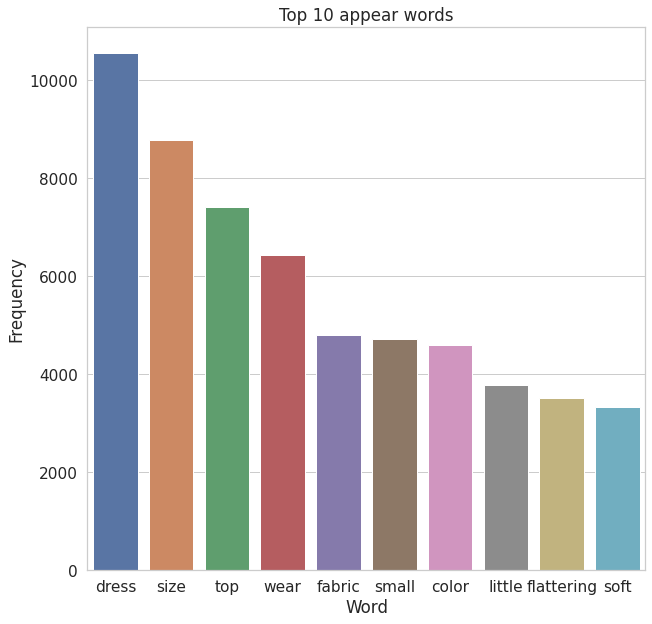

In [ ]:
## plot top 10 appear words
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10)).set(title="Top 10 appear words")